In [1]:
!pip install nltk scikit-learn pandas numpy matplotlib seaborn


In [3]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import os
os.getcwd()


'C:\\Users\\GP75 Leopard'

In [13]:
import os
os.listdir()


['.anaconda',
 '.android',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.streamlit',
 '.thumbnails',
 '.vscode',
 '3D Objects',
 'AddedFeatures_campaign_sale.csv',
 'anaconda_projects',
 'ansel',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'Pictures',
 'PrintHood',
 'Project1_Sales_campaign revised (1).ipynb',
 'Project1_Sales_campaign.ipynb',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'sms_spam_classifier.ipynb',
 'Start Menu',
 'Templates',
 'Videos',
 'WPS Cloud

In [17]:
df = pd.read_csv("spam.csv", sep="\t", names=["label", "message"], encoding="latin-1")
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [23]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt_tab to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\GP75 Leopard\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [25]:
df['cleaned'] = df['message'].apply(preprocess)
df.head()


,label,message,label_num,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though


In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def preprocess(text):

    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 6. Tokenize
    tokens = nltk.word_tokenize(text)

    # 7. Remove stopwords & non-alphanumeric words
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

    # 8. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 9. Join back to text
    cleaned_text = " ".join(tokens)

    return cleaned_text

df['cleaned'] = df['message'].apply(preprocess)
df.head()


[nltk_data] Downloading package punkt to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\GP75
[nltk_data]     Leopard\AppData\Roaming\nltk_data...


,label,message,label_num,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think go usf life around though


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned']).toarray()
y = df['label_num']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [33]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



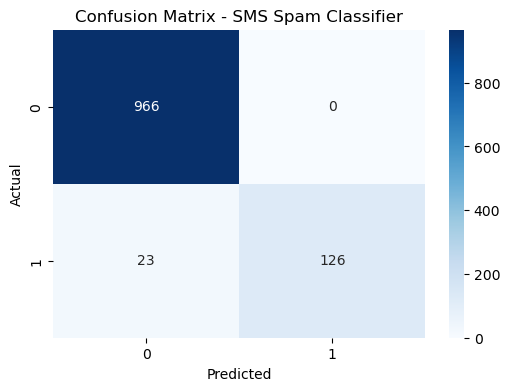

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SMS Spam Classifier")
plt.show()


In [39]:
import pickle

pickle.dump(model, open("spam_model.pkl", "wb"))


In [41]:
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))


In [43]:
def predict_sms(text):
    cleaned_text = preprocess(text)
    vector = tfidf.transform([cleaned_text]).toarray()
    prediction = model.predict(vector)[0]

    return "SPAM" if prediction == 1 else "HAM (Not Spam)"


In [45]:
predict_sms("Congratulations! You won a free lottery. Call now!")


'SPAM'

In [47]:
predict_sms("Hey, are we meeting today?")


'HAM (Not Spam)'